In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('OneDrive/Desktop/augmented_with_duplicates.csv')
print(df.head())

    ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0  1.0       1.0       0.0       1.0       0.0       1.0       0.0       1.0   
1  2.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2  3.0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   
3  4.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4  5.0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0       0.0       1.0  ...       f               ?       no     no   
1       0.0       0.0  ...       m               ?       no     no   
2       1.0       1.0  ...       m  White-European       no    yes   
3       0.0       0.0  ...       f               ?       no     no   
4       0.0       0.0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria   

In [3]:
df.shape

(8800, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8800 non-null   float64
 1   A1_Score         8800 non-null   float64
 2   A2_Score         8800 non-null   float64
 3   A3_Score         8800 non-null   float64
 4   A4_Score         8800 non-null   float64
 5   A5_Score         8800 non-null   float64
 6   A6_Score         8800 non-null   float64
 7   A7_Score         8800 non-null   float64
 8   A8_Score         8800 non-null   float64
 9   A9_Score         8800 non-null   float64
 10  A10_Score        8800 non-null   float64
 11  age              8800 non-null   float64
 12  gender           8800 non-null   object 
 13  ethnicity        8800 non-null   object 
 14  jaundice         8800 non-null   object 
 15  austim           8800 non-null   object 
 16  contry_of_res    8800 non-null   object 
 17  used_app_befor

In [5]:
print(df.isnull())

         ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   
...     ...       ...       ...       ...       ...       ...       ...   
8795  False     False     False     False     False     False     False   
8796  False     False     False     False     False     False     False   
8797  False     False     False     False     False     False     False   
8798  False     False     False     False     False     False     False   
8799  False     False     False     False     False     False     False   

      A7_Score  A8_Score  A9_Score  ...  gender  ethnicity  jaundice  austim  \
0        False     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8800.0,3997.302045,2308.960944,1.000000,2006.750000,3984.500000,6002.250000,8000.000000
A1_Score,8800.0,0.582727,0.493137,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,8800.0,0.549205,0.497601,-0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,8800.0,0.438636,0.496248,-0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,8800.0,0.398750,0.489669,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,8800.0,0.376136,0.484442,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,8800.0,0.295795,0.456425,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,8800.0,0.388295,0.487390,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,8800.0,0.528523,0.499214,-0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,8800.0,0.524886,0.499409,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
#Data Normalisation(Min-Max)
from sklearn.preprocessing import MinMaxScaler
df_numeric = df.select_dtypes(include=['float64', 'int64'])
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print("Min-Max Scaled Data:\n", df_minmax.head())

Min-Max Scaled Data:
          ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0  0.000000       1.0       0.0       1.0       0.0       1.0       0.0   
1  0.000125       0.0       0.0       0.0       0.0       0.0       0.0   
2  0.000250       1.0       1.0       1.0       1.0       1.0       1.0   
3  0.000375       0.0       0.0       0.0       0.0       0.0       0.0   
4  0.000500       0.0       0.0       0.0       0.0       0.0       0.0   

   A7_Score  A8_Score  A9_Score  A10_Score       age    result  Class/ASD  
0       1.0       0.0       1.0        1.0  0.408726  0.567913        0.0  
1       0.0       0.0       0.0        0.0  0.519141  0.381655        0.0  
2       1.0       1.0       1.0        1.0  0.053743  0.954452        1.0  
3       0.0       0.0       0.0        0.0  0.240288  0.382630        0.0  
4       0.0       0.0       0.0        0.0  0.466748  0.061865        0.0  


In [8]:
#Data Normalisation(mean)
df_mean_normalized = (df_numeric - df_numeric.mean()) / (df_numeric.max() - df_numeric.min())
print("Mean Normalized Data:\n", df_mean_normalized.head())

Mean Normalized Data:
          ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0 -0.499600  0.417273 -0.549205  0.561364  -0.39875  0.623864 -0.295795   
1 -0.499475 -0.582727 -0.549205 -0.438636  -0.39875 -0.376136 -0.295795   
2 -0.499350  0.417273  0.450795  0.561364   0.60125  0.623864  0.704205   
3 -0.499225 -0.582727 -0.549205 -0.438636  -0.39875 -0.376136 -0.295795   
4 -0.499100 -0.582727 -0.549205 -0.438636  -0.39875 -0.376136 -0.295795   

   A7_Score  A8_Score  A9_Score  A10_Score       age    result  Class/ASD  
0  0.611705 -0.528523  0.475114   0.360114  0.112153 -0.103565  -0.195227  
1 -0.388295 -0.528523 -0.524886  -0.639886  0.222569 -0.289824  -0.195227  
2  0.611705  0.471477  0.475114   0.360114 -0.242830  0.282973   0.804773  
3 -0.388295 -0.528523 -0.524886  -0.639886 -0.056284 -0.288849  -0.195227  
4 -0.388295 -0.528523 -0.524886  -0.639886  0.170176 -0.609614  -0.195227  


In [9]:
#Data Normalisation(z-score)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print("Z-Score Standardized Data:\n", df_zscore.head())

Z-Score Standardized Data:
          ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0 -1.730878  0.846208 -1.103767  1.131279 -0.814372  1.287870 -0.648106   
1 -1.730445 -1.181742 -1.103767 -0.883955 -0.814372 -0.776476 -0.648106   
2 -1.730012  0.846208  0.905989  1.131279  1.227940  1.287870  1.542956   
3 -1.729578 -1.181742 -1.103767 -0.883955 -0.814372 -0.776476 -0.648106   
4 -1.729145 -1.181742 -1.103767 -0.883955 -0.814372 -0.776476 -0.648106   

   A7_Score  A8_Score  A9_Score  A10_Score       age    result  Class/ASD  
0  1.255133 -1.058770  0.951406   0.750185  0.607380 -0.489499  -0.492531  
1 -0.796728 -1.058770 -1.051075  -1.333005  1.205347 -1.369843  -0.492531  
2  1.255133  0.944493  0.951406   0.750185 -1.315076  1.337464   2.030329  
3 -0.796728 -1.058770 -1.051075  -1.333005 -0.304815 -1.365236  -0.492531  
4 -0.796728 -1.058770 -1.051075  -1.333005  0.921607 -2.881323  -0.492531  


In [10]:
#Data Normalisation(robust scaling)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print("Robust Scaled Data:\n", df_robust.head())

Robust Scaled Data:
          ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0 -0.996997       0.0      -1.0       1.0       0.0       1.0       0.0   
1 -0.996746      -1.0      -1.0       0.0       0.0       0.0       0.0   
2 -0.996496       0.0       0.0       1.0       1.0       1.0       1.0   
3 -0.996246      -1.0      -1.0       0.0       0.0       0.0       0.0   
4 -0.995995      -1.0      -1.0       0.0       0.0       0.0       0.0   

   A7_Score  A8_Score  A9_Score  A10_Score       age    result  Class/ASD  
0       1.0      -1.0       0.0        0.0  0.753972 -0.492222        0.0  
1       0.0      -1.0      -1.0       -1.0  1.295071 -1.101623        0.0  
2       1.0       0.0       0.0        0.0 -0.985652  0.772455        1.0  
3       0.0      -1.0      -1.0       -1.0 -0.071470 -1.098434        0.0  
4       0.0      -1.0      -1.0       -1.0  1.038315 -2.147914        0.0  


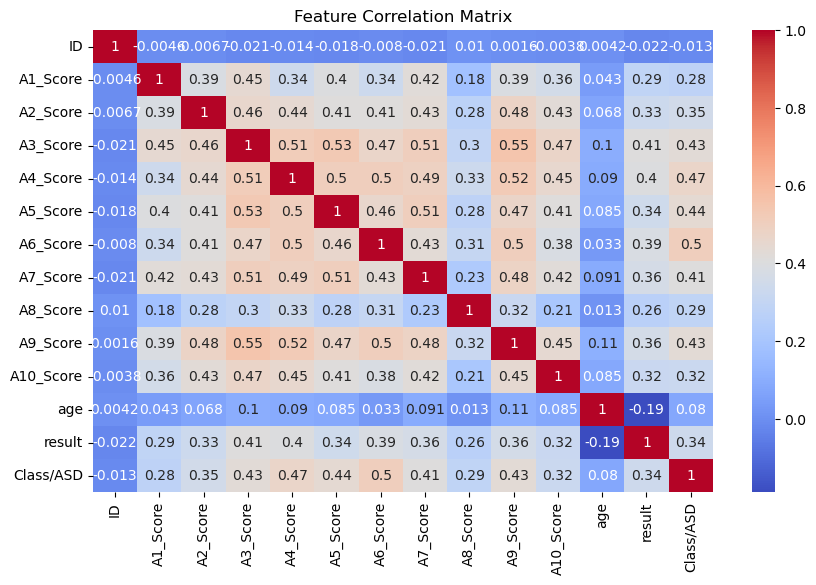

In [11]:
#Feature selection(filter(Correlation Matrix))
#correlation between each feature and the target
import seaborn as sns
import matplotlib.pyplot as plt

X = df_numeric.drop(columns=['Class/ASD']) 
y = df_numeric['Class/ASD']
# Compute correlation
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [12]:
#Feature selection(wrapper(Recursive Feature Elimination (RFE)))
#removes the least important feature iteratively using a model
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create model
model = RandomForestClassifier()

# Perform RFE
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features_rfe = X.columns[rfe.support_]
print("Top Features (RFE):", selected_features_rfe)

Top Features (RFE): Index(['ID', 'A4_Score', 'A6_Score', 'age', 'result'], dtype='object')


      Feature  Importance
12     result    0.215599
11        age    0.199314
6    A6_Score    0.112684
0          ID    0.112677
4    A4_Score    0.072619
5    A5_Score    0.062751
9    A9_Score    0.051194
3    A3_Score    0.048714
7    A7_Score    0.041883
8    A8_Score    0.030201
1    A1_Score    0.017733
2    A2_Score    0.017578
10  A10_Score    0.017053


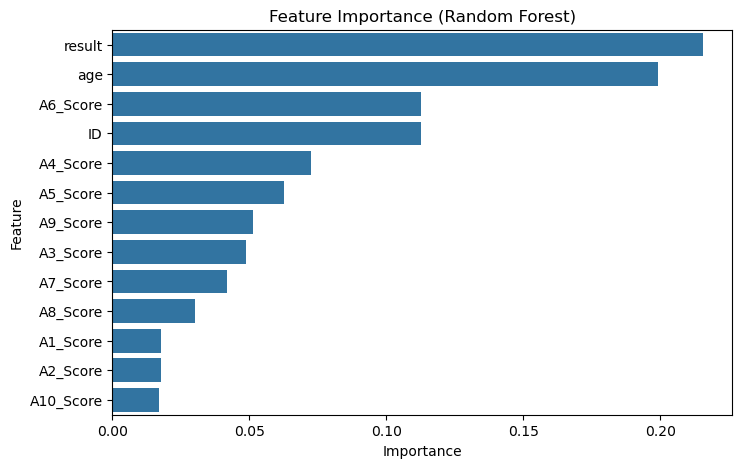

In [13]:
#Feature selection(Intrinsic(Feature Importance from Random Forest))
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Sort and display
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance.Importance, y=feature_importance.Feature)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [14]:
#Feature selection(Intrinsic(LASSO Regression (L1 Regularization)))
#LASSO removes less important features by reducing their coefficients to zero.
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Apply Lasso
lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso.fit(X, y)

# Select important features
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X.columns[model.get_support()]
print("Top Features (LASSO):", selected_features_lasso)

Top Features (LASSO): Index(['A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       'A9_Score', 'age', 'result'],
      dtype='object')


Class/ASD
0.0    7082
1.0    1718
Name: count, dtype: int64


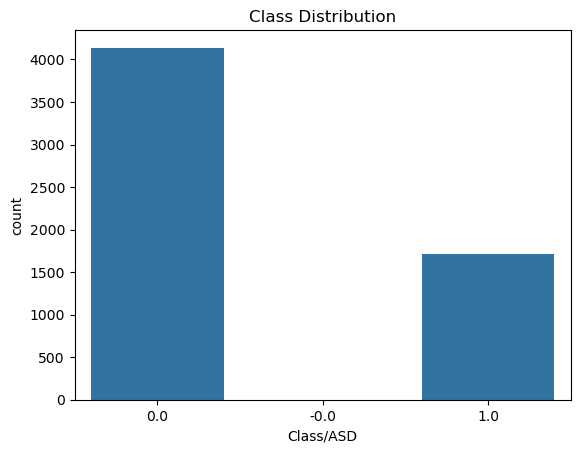

In [15]:
#imbalace 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
print(df['Class/ASD'].value_counts())

# Plot class distribution
sns.countplot(x=df['Class/ASD'])
plt.title("Class Distribution")
plt.show()

Class Distribution Before Handling Imbalance:
 Class/ASD
0.0    7082
1.0    1718
Name: count, dtype: int64


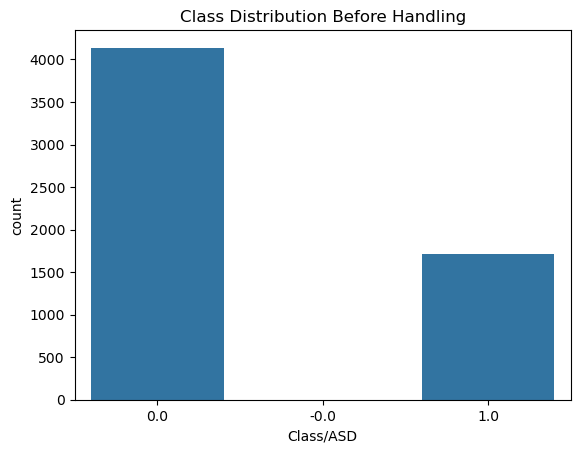


 Results with Class Weights Adjustment:
              precision    recall  f1-score   support

        -0.0       0.97      0.98      0.97      1416
         1.0       0.89      0.86      0.88       344

    accuracy                           0.95      1760
   macro avg       0.93      0.92      0.92      1760
weighted avg       0.95      0.95      0.95      1760

[[1381   35]
 [  47  297]]

 Results with SMOTE + RandomForest:
              precision    recall  f1-score   support

        -0.0       0.97      0.97      0.97      1416
         1.0       0.89      0.89      0.89       344

    accuracy                           0.96      1760
   macro avg       0.93      0.93      0.93      1760
weighted avg       0.96      0.96      0.96      1760

[[1380   36]
 [  39  305]]


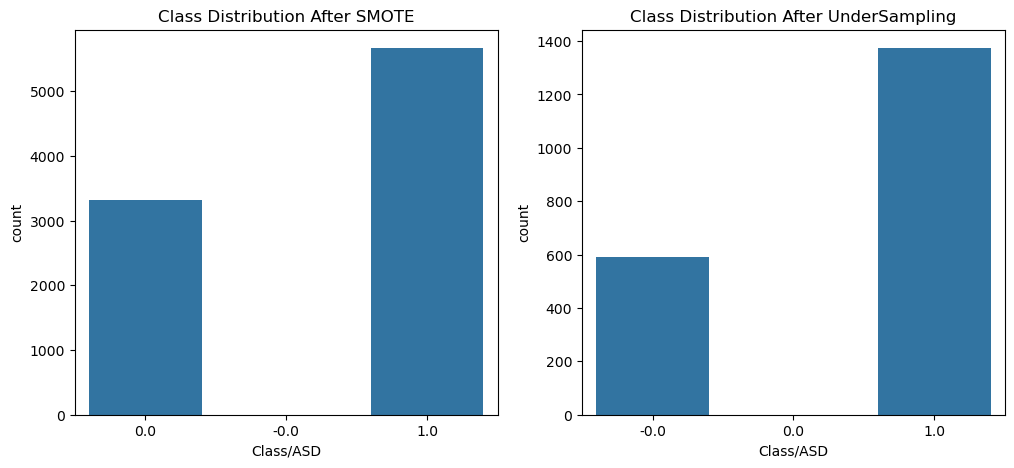

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# step 1: Load the data set
# Step 2: Select Only Numeric Features (Float & Int)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Step 3: Define Features (X) and Target (y)
if 'Class/ASD' not in df_numeric:
    raise ValueError("Target column 'Class/ASD' not found in dataset!")

X = df_numeric.drop(columns=['Class/ASD'])
y = df_numeric['Class/ASD']

# Step 4: Check Class Distribution
print("Class Distribution Before Handling Imbalance:\n", y.value_counts())

# Plot class distribution
sns.countplot(x=y)
plt.title("Class Distribution Before Handling")
plt.show()

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

###  METHOD 1: SAMPLING TECHNIQUES (SMOTE + UnderSampling) ###
# Over-sampling with SMOTE (For Minority Class)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Under-sampling (Reduce Majority Class)
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

# Combination: SMOTE + ENN (Enhanced Technique)
smote_enn = SMOTEENN(random_state=42)
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)

###  METHOD 2: ALGORITHMIC APPROACH (CLASS WEIGHT ADJUSTMENT) ###
# Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train Model with Class Weights
clf_weighted = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
clf_weighted.fit(X_train, y_train)

# Predict
y_pred_weighted = clf_weighted.predict(X_test)

### METHOD 3: ENSEMBLING TECHNIQUES (RandomForest + SMOTE) ###
# Train with SMOTE
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_smote, y_smote)

# Predict
y_pred_smote = clf_smote.predict(X_test)

###  Evaluate Models ###
print("\n Results with Class Weights Adjustment:")
print(classification_report(y_test, y_pred_weighted))
print(confusion_matrix(y_test, y_pred_weighted))

print("\n Results with SMOTE + RandomForest:")
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))

# Plot Class Distribution After SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_smote)
plt.title("Class Distribution After SMOTE")

plt.subplot(1, 2, 2)
sns.countplot(x=y_under)
plt.title("Class Distribution After UnderSampling")

plt.show()


In [17]:
df['ethnicity'].value_counts()

ethnicity
White-European     3068
?                  2094
Middle Eastern      972
Asian               749
Black               503
South Asian         387
Pasifika            336
Others              270
Latino              228
Hispanic             94
Turkish              62
others               37
Name: count, dtype: int64

In [18]:
df['relation'].value_counts()

relation
Self                        7810
?                            453
Parent                       334
Relative                     162
Others                        27
Health care professional      14
Name: count, dtype: int64

In [19]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

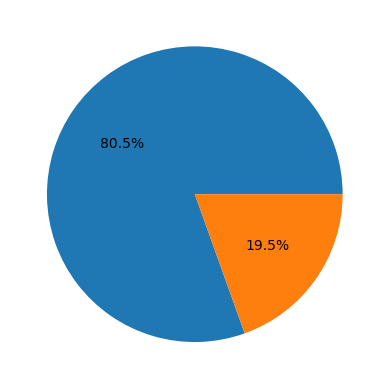

In [20]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [21]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

In [22]:
ints = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score','A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','ID','Class/ASD']
ints = [x for x in ints if x not in ['ID', 'Class/ASD']]  # Remove 'ID' and 'Class/ASD'
print(ints)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


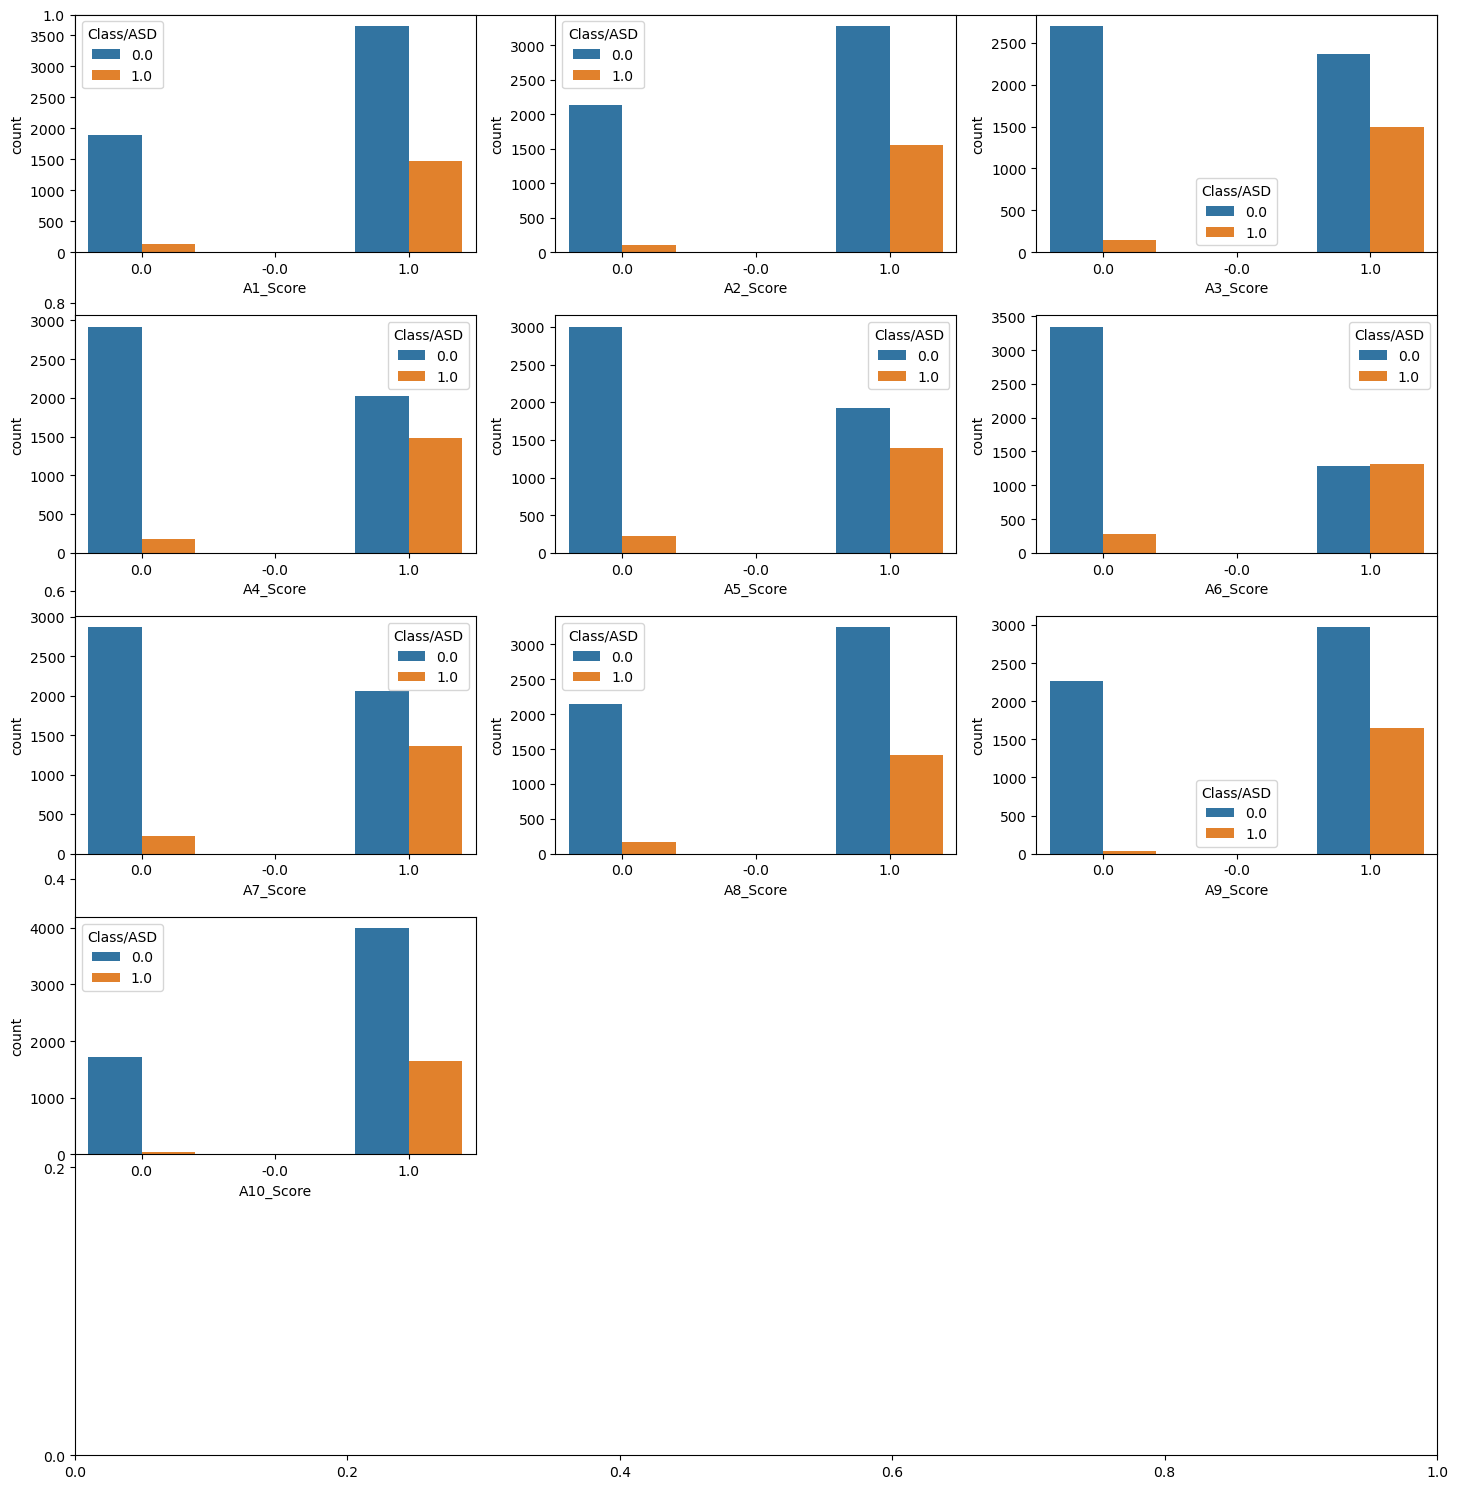

In [23]:
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15, 15))

for i, col in enumerate(ints):
    plt.subplot(5, 3, i + 1)
    # Use the melted DataFrame and specify x and hue
    sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col])
    # Set the x-axis label to the current column name
    plt.xlabel(col)

plt.tight_layout()
plt.show()

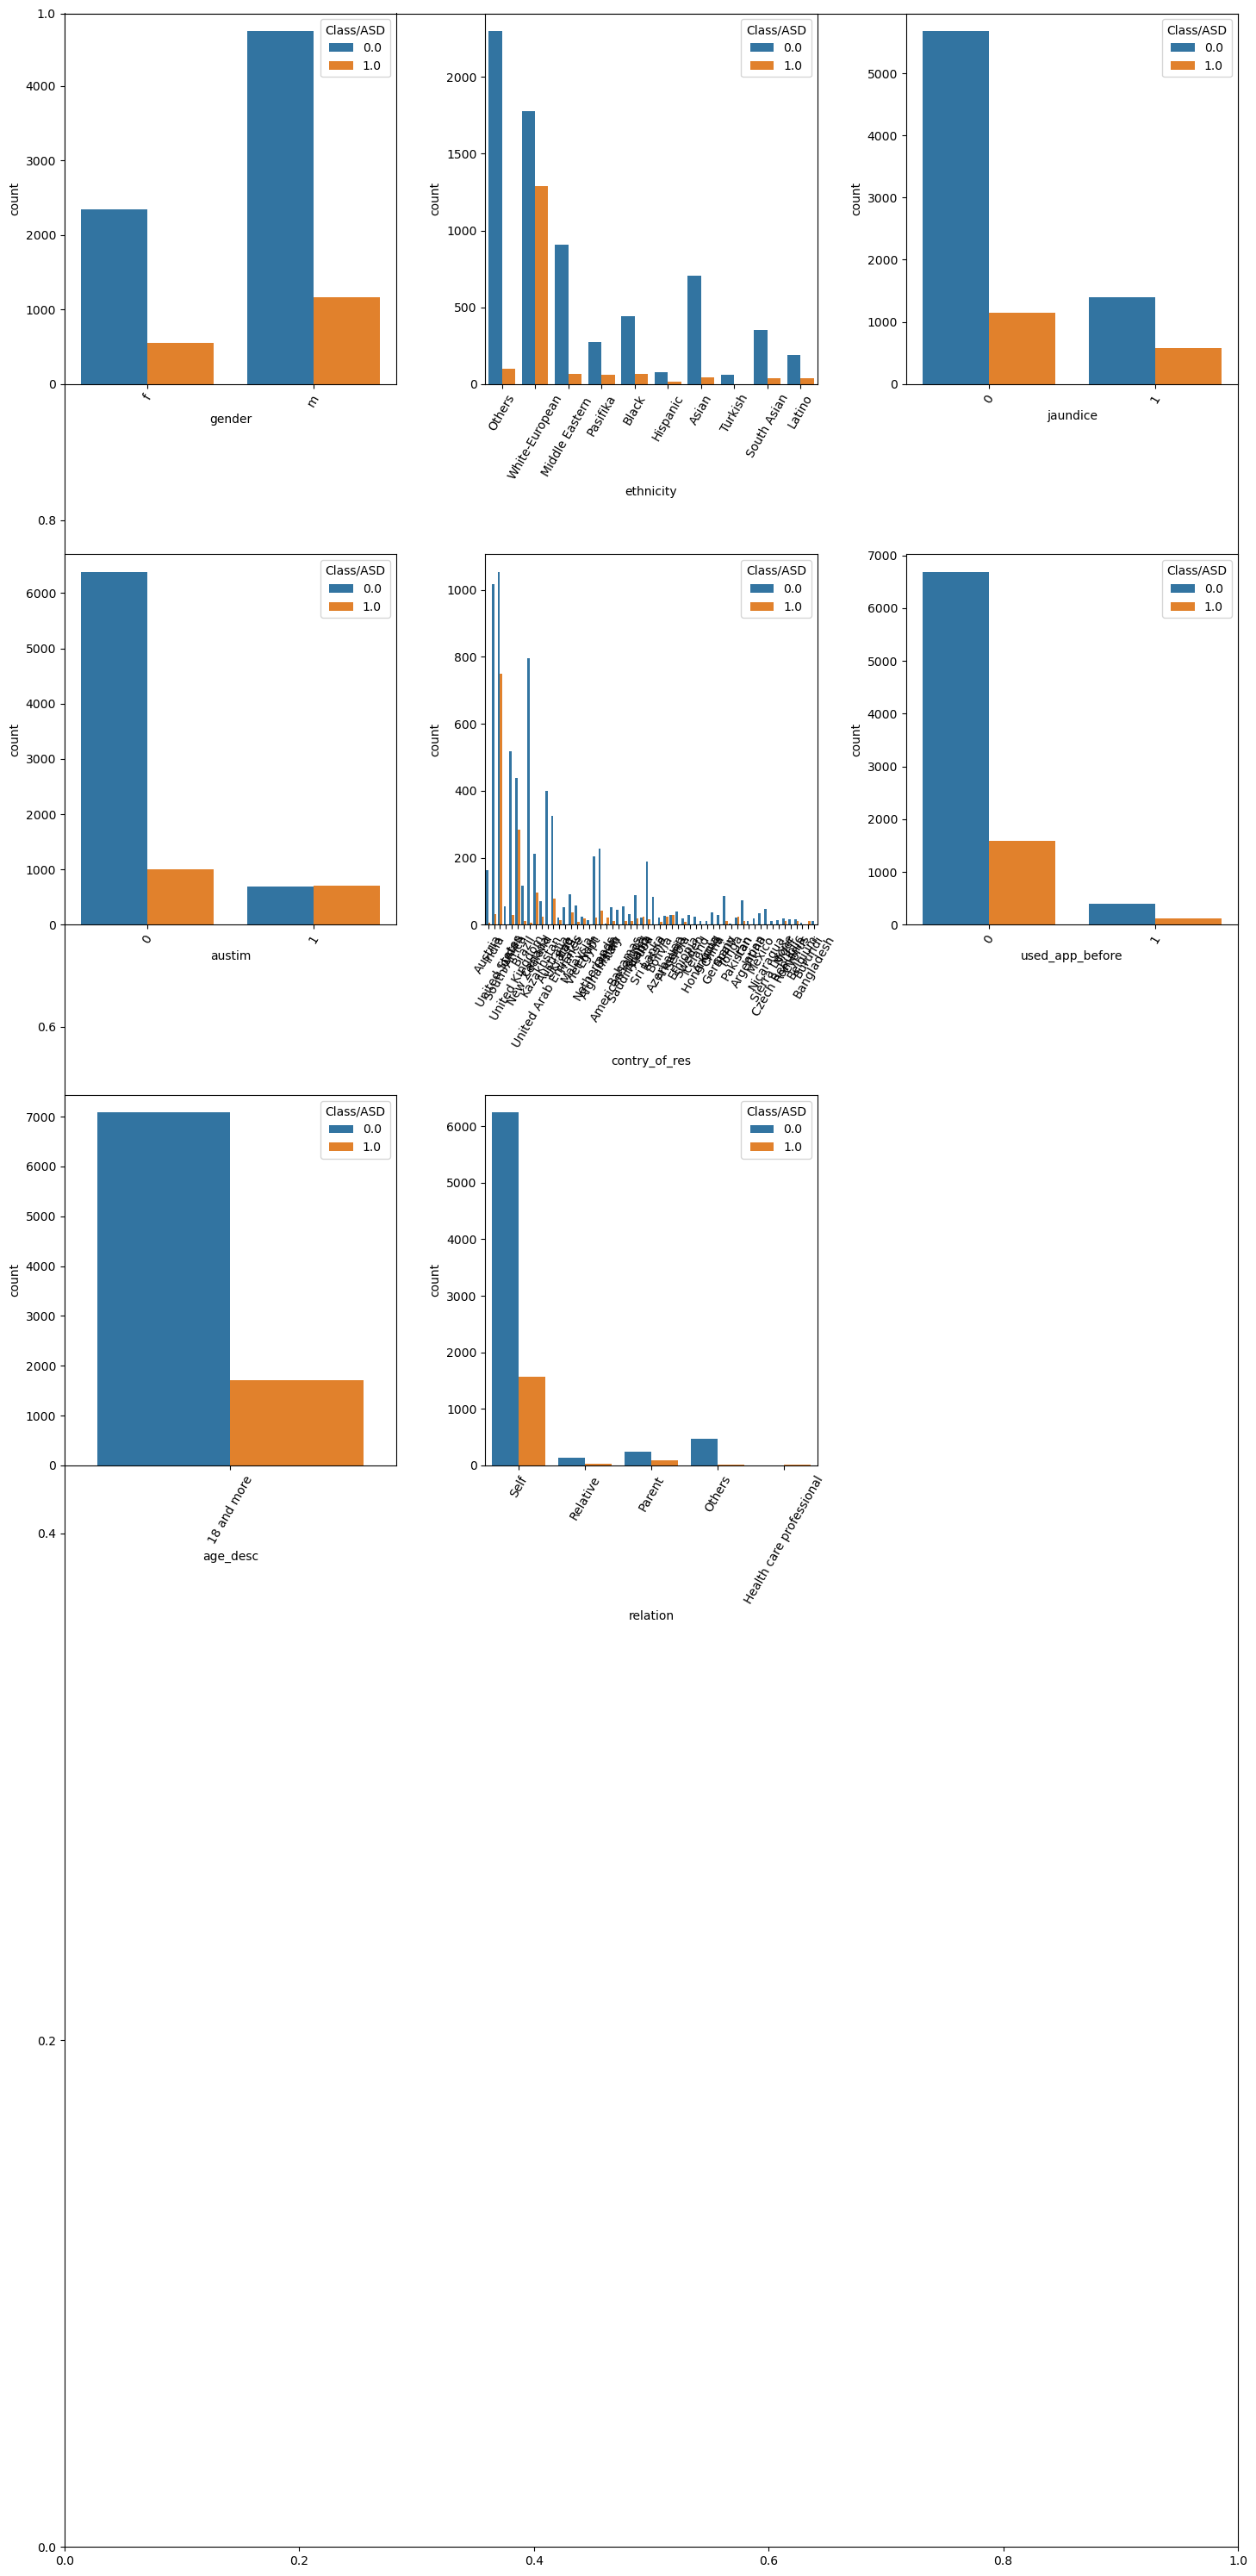

In [24]:
objects = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['Class/ASD'], value_vars=[col], var_name='col', value_name='value')
    
    # Use the melted DataFrame and specify x and hue
    sb.countplot(x='value', hue='Class/ASD', data=df_melted)
    plt.xticks(rotation=60)
    plt.xlabel(col)  # Set the x-axis label to the column name

plt.tight_layout()
plt.show()

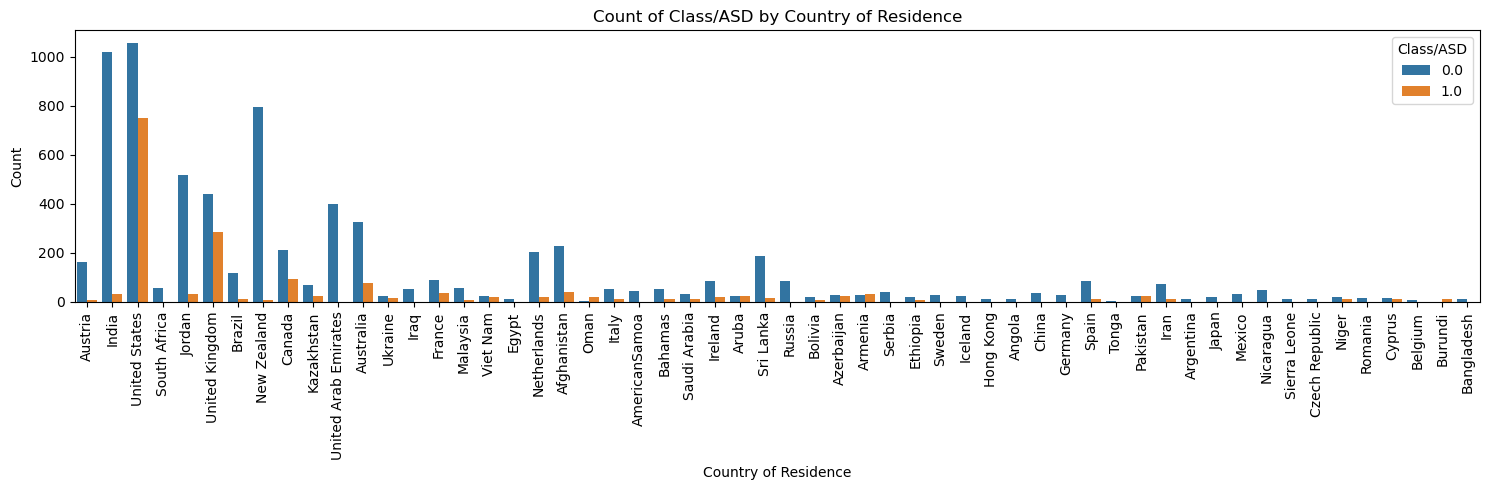

In [25]:
plt.figure(figsize=(15, 5))  # Adjust the figure size
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')  # Create a count plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Country of Residence")  # Add a descriptive x-axis label
plt.ylabel("Count")  # Add a descriptive y-axis label
plt.title("Count of Class/ASD by Country of Residence")  # Add a title
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

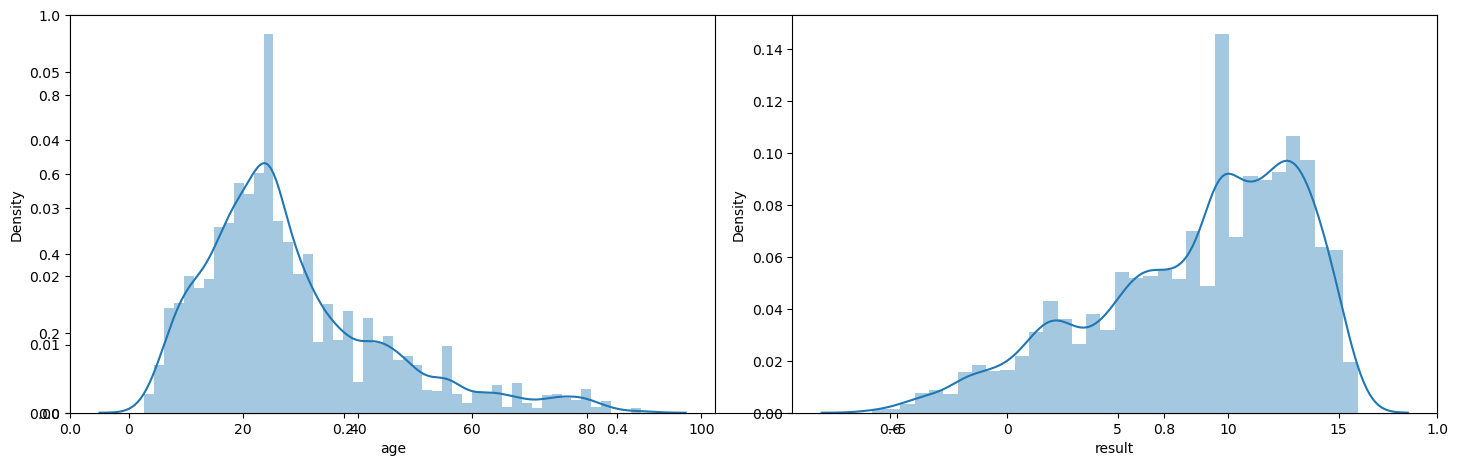

In [26]:
floats=['age','result']
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

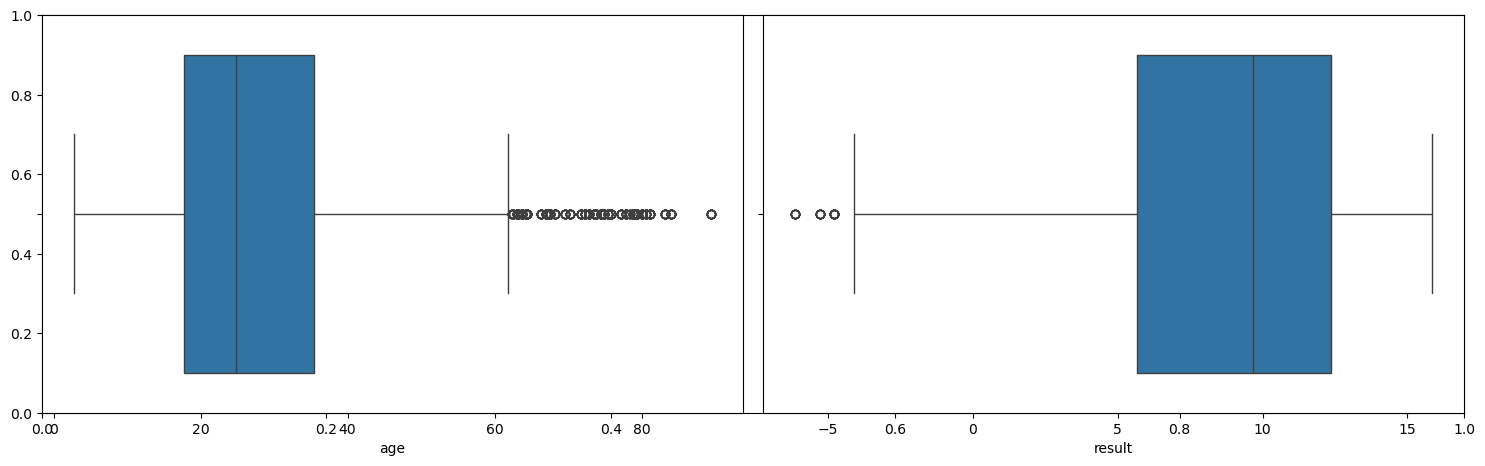

In [27]:
floats = ['age', 'result']
plt.subplots(figsize=(15, 5))

for i, col in enumerate(floats):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns for subplots
    sb.boxplot(x=df[col])    # Use x=df[col] for horizontal boxplots
    plt.xlabel(col)          # Set the x-axis label to the column name

plt.tight_layout()
plt.show()

In [28]:
df = df[df['result']>-5]
df.shape

(8784, 22)

In [29]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

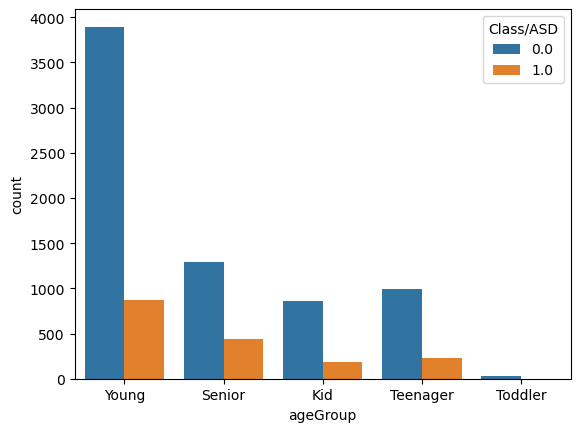

In [30]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [31]:
def add_feature(data):
  
  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:
    
    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)

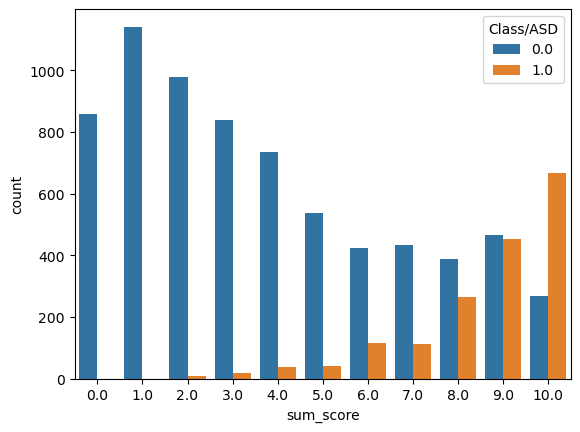

In [32]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [33]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

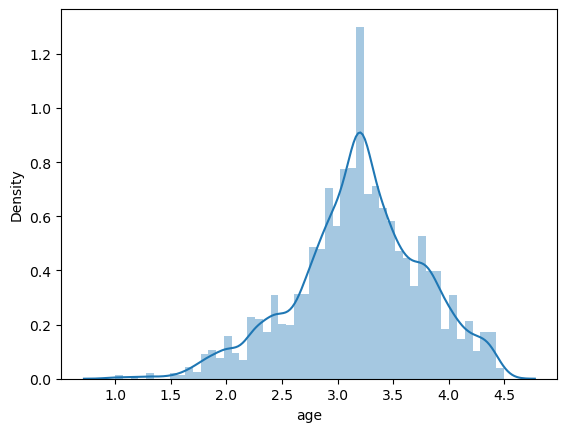

In [34]:
sb.distplot(df['age'])
plt.show()

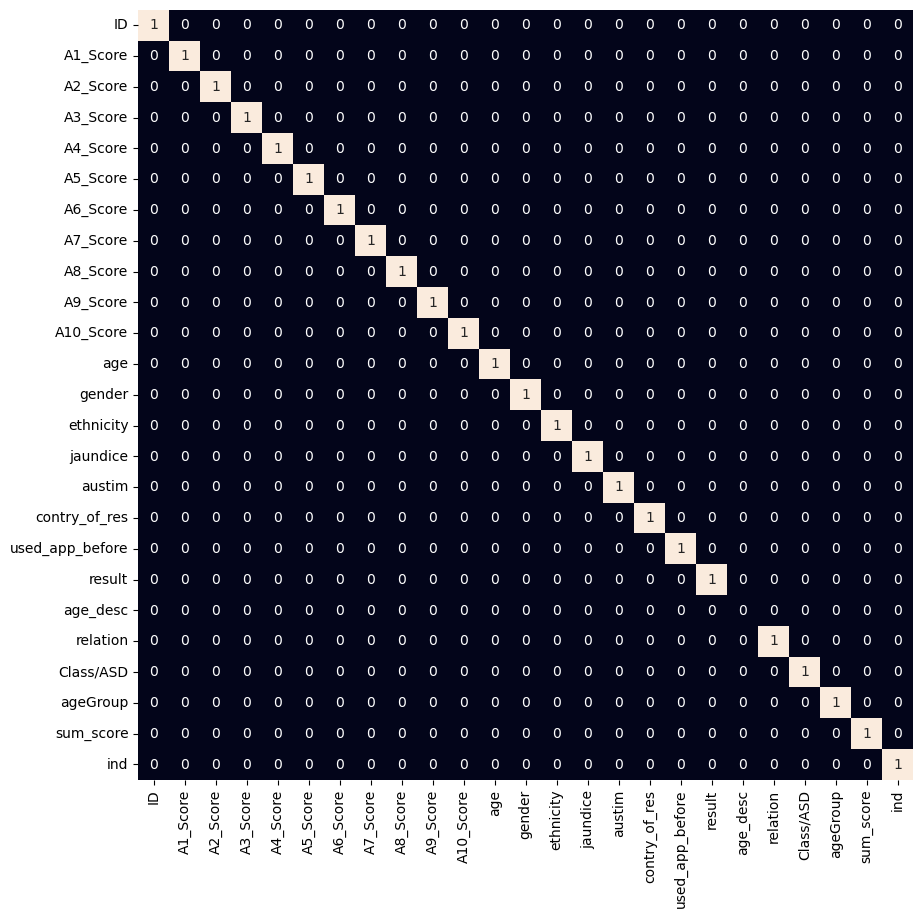

In [35]:
def encode_labels(data):
    for col in data.columns:
      
      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [36]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [37]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((11302, 20), (11302,))

In [38]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

LogisticRegression :
Validation Accuracy :  0.8460858027421495
Validation Precision :  0.8155970755483347
Validation Recall :  0.8924444444444445
Validation F1 Score :  0.8522920203735145
Child -> Accuracy: 0.8503311258278146, Precision: 0.8175182481751825, Recall: 0.8983957219251337, F1 Score: 0.8560509554140128
Adolescent -> Accuracy: 0.8504672897196262, Precision: 0.8223844282238443, Recall: 0.896551724137931, F1 Score: 0.8578680203045685
Adult -> Accuracy: 0.8375165125495376, Precision: 0.8068459657701712, Recall: 0.8823529411764706, F1 Score: 0.842911877394636

XGBClassifier :
Validation Accuracy :  0.9933657673595754
Validation Precision :  0.9868421052631579
Validation Recall :  1.0
Validation F1 Score :  0.9933774834437086
Child -> Accuracy: 0.9920529801324504, Precision: 0.9842105263157894, Recall: 1.0, F1 Score: 0.9920424403183024
Adolescent -> Accuracy: 0.9933244325767691, Precision: 0.9869109947643979, Recall: 1.0, F1 Score: 0.9934123847167325
Adult -> Accuracy: 0.994715984

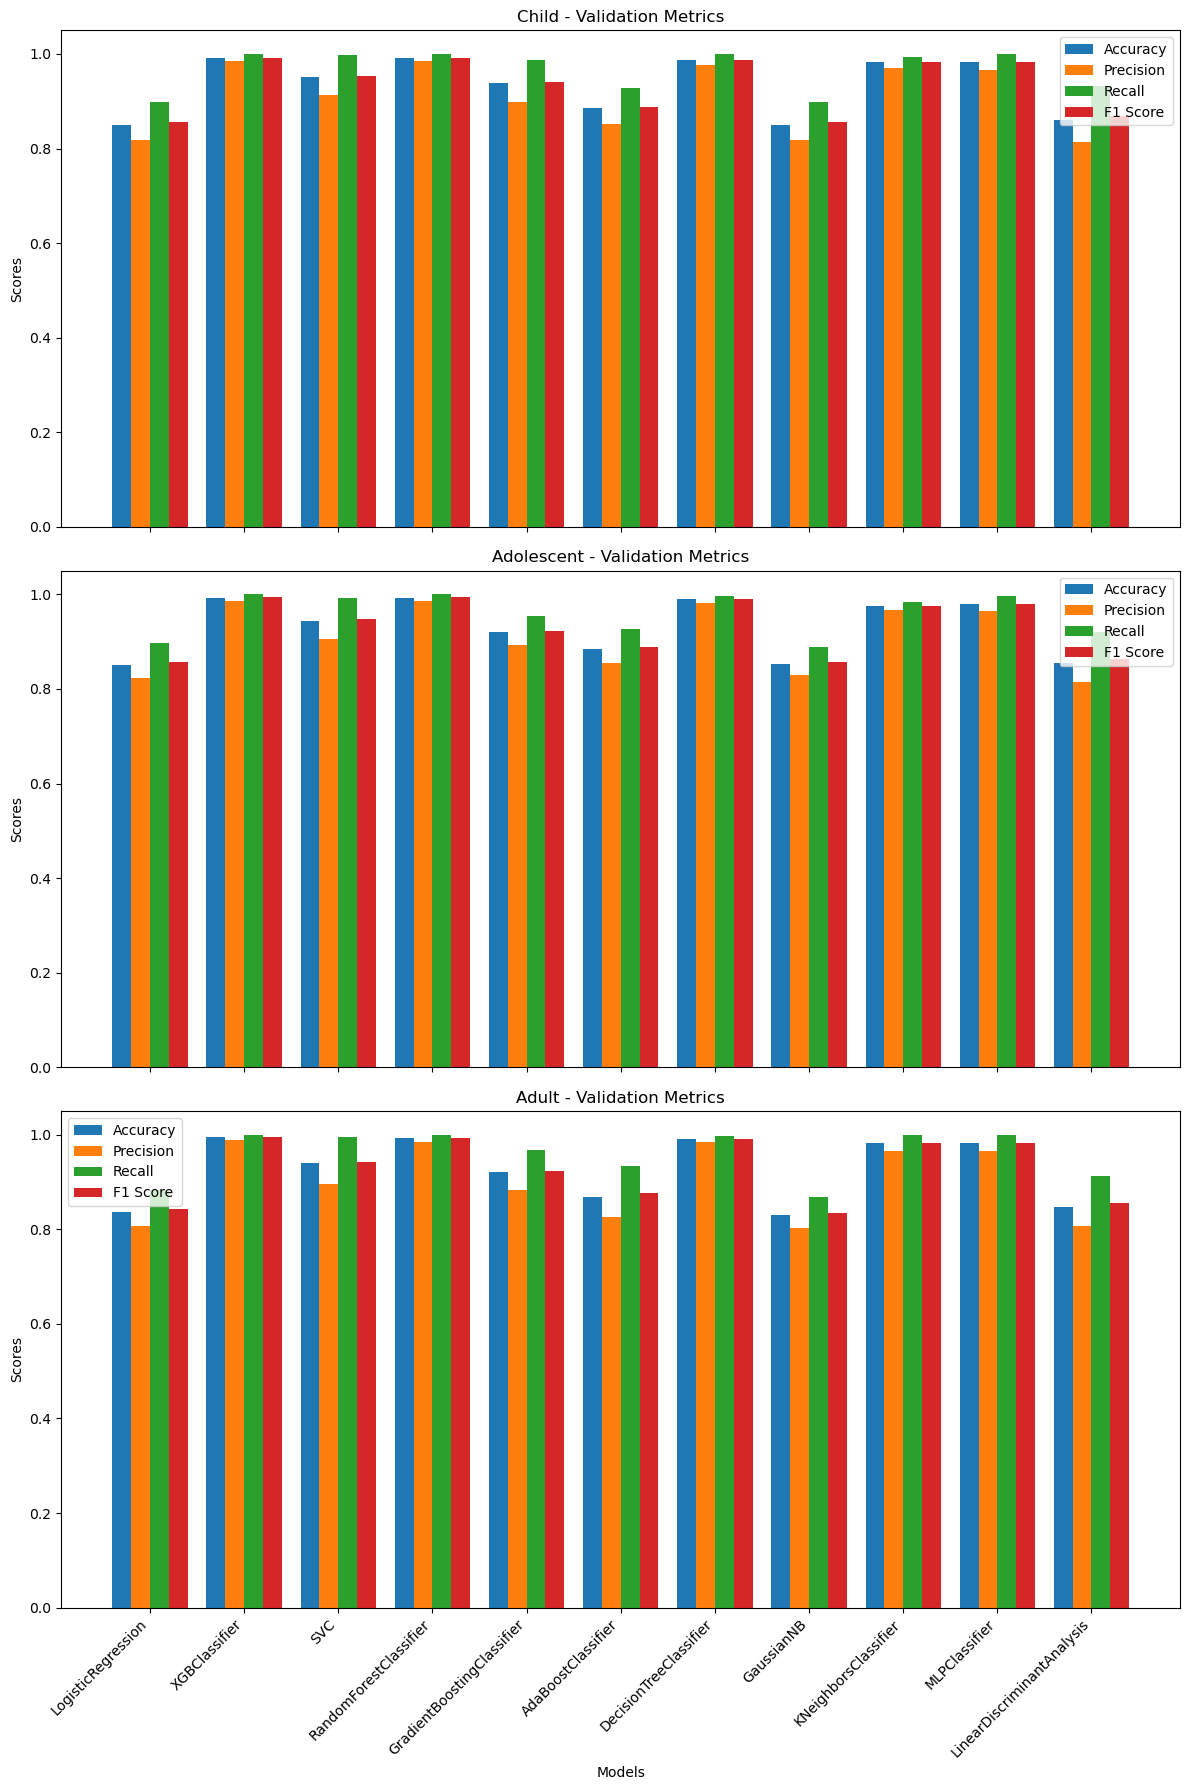

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Assuming X is the feature matrix and Y is the label vector
if len(X) != len(Y):
    raise ValueError("Feature matrix X and label vector Y must have the same length.")

# Generating age groups if not defined or mismatched
if 'age_groups' not in locals() or len(age_groups) != len(Y):
    np.random.seed(42)
    age_groups = np.random.choice(['Child', 'Adolescent', 'Adult'], size=len(Y))

X_train, X_val, Y_train, Y_val, age_groups_train, age_groups_val = train_test_split(
    X, Y, age_groups, test_size=0.2, random_state=42
)

models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf', probability=True),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=500),
    LinearDiscriminantAnalysis()
]

validation_results = []

for model in models:
    model.fit(X_train, Y_train)
    val_preds = model.predict(X_val)

    accuracy = accuracy_score(Y_val, val_preds)
    precision = precision_score(Y_val, val_preds)
    recall = recall_score(Y_val, val_preds)
    f1 = f1_score(Y_val, val_preds)

    # Age-wise metrics
    age_results = {}
    for age_group in ['Child', 'Adolescent', 'Adult']:
        indices = np.where(np.array(age_groups_val) == age_group)
        age_y_true = np.array(Y_val)[indices]
        age_y_pred = np.array(val_preds)[indices]

        if len(age_y_true) > 0:
            age_accuracy = accuracy_score(age_y_true, age_y_pred)
            age_precision = precision_score(age_y_true, age_y_pred)
            age_recall = recall_score(age_y_true, age_y_pred)
            age_f1 = f1_score(age_y_true, age_y_pred)
        else:
            age_accuracy = age_precision = age_recall = age_f1 = np.nan

        age_results[age_group] = (age_accuracy, age_precision, age_recall, age_f1)

    validation_results.append((model.__class__.__name__, accuracy, precision, recall, f1, age_results))

    print(f'{model.__class__.__name__} :')
    print('Validation Accuracy : ', accuracy)
    print('Validation Precision : ', precision)
    print('Validation Recall : ', recall)
    print('Validation F1 Score : ', f1)
    for age_group, (age_accuracy, age_precision, age_recall, age_f1) in age_results.items():
        print(f'{age_group} -> Accuracy: {age_accuracy}, Precision: {age_precision}, Recall: {age_recall}, F1 Score: {age_f1}')
    print()

# Plotting age-wise results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
age_groups = ['Child', 'Adolescent', 'Adult']

fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

for i, age_group in enumerate(age_groups):
    age_values = np.array([[x[5][age_group][j] for x in validation_results] for j in range(4)])
    x = np.arange(len(models))
    width = 0.2

    for j, metric in enumerate(metrics):
        axs[i].bar(x + j * width, age_values[j], width, label=metric)
    
    axs[i].set_title(f'{age_group} - Validation Metrics')
    axs[i].set_ylabel('Scores')
    axs[i].set_xticks(x + width * 1.5)
    axs[i].set_xticklabels([x[0] for x in validation_results], rotation=45, ha='right')
    axs[i].legend()

axs[-1].set_xlabel('Models')
plt.tight_layout()
plt.show()


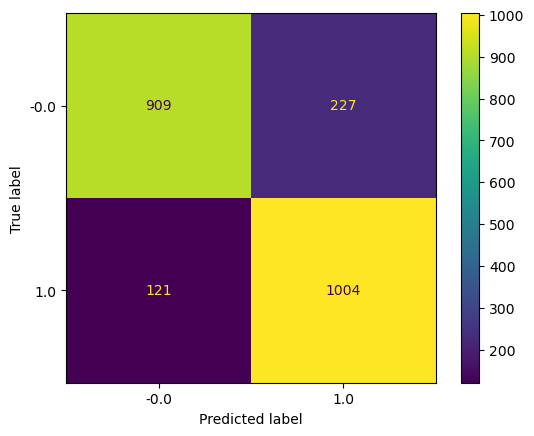

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()